### 축산물 품목별 소비자 물가지수 추이

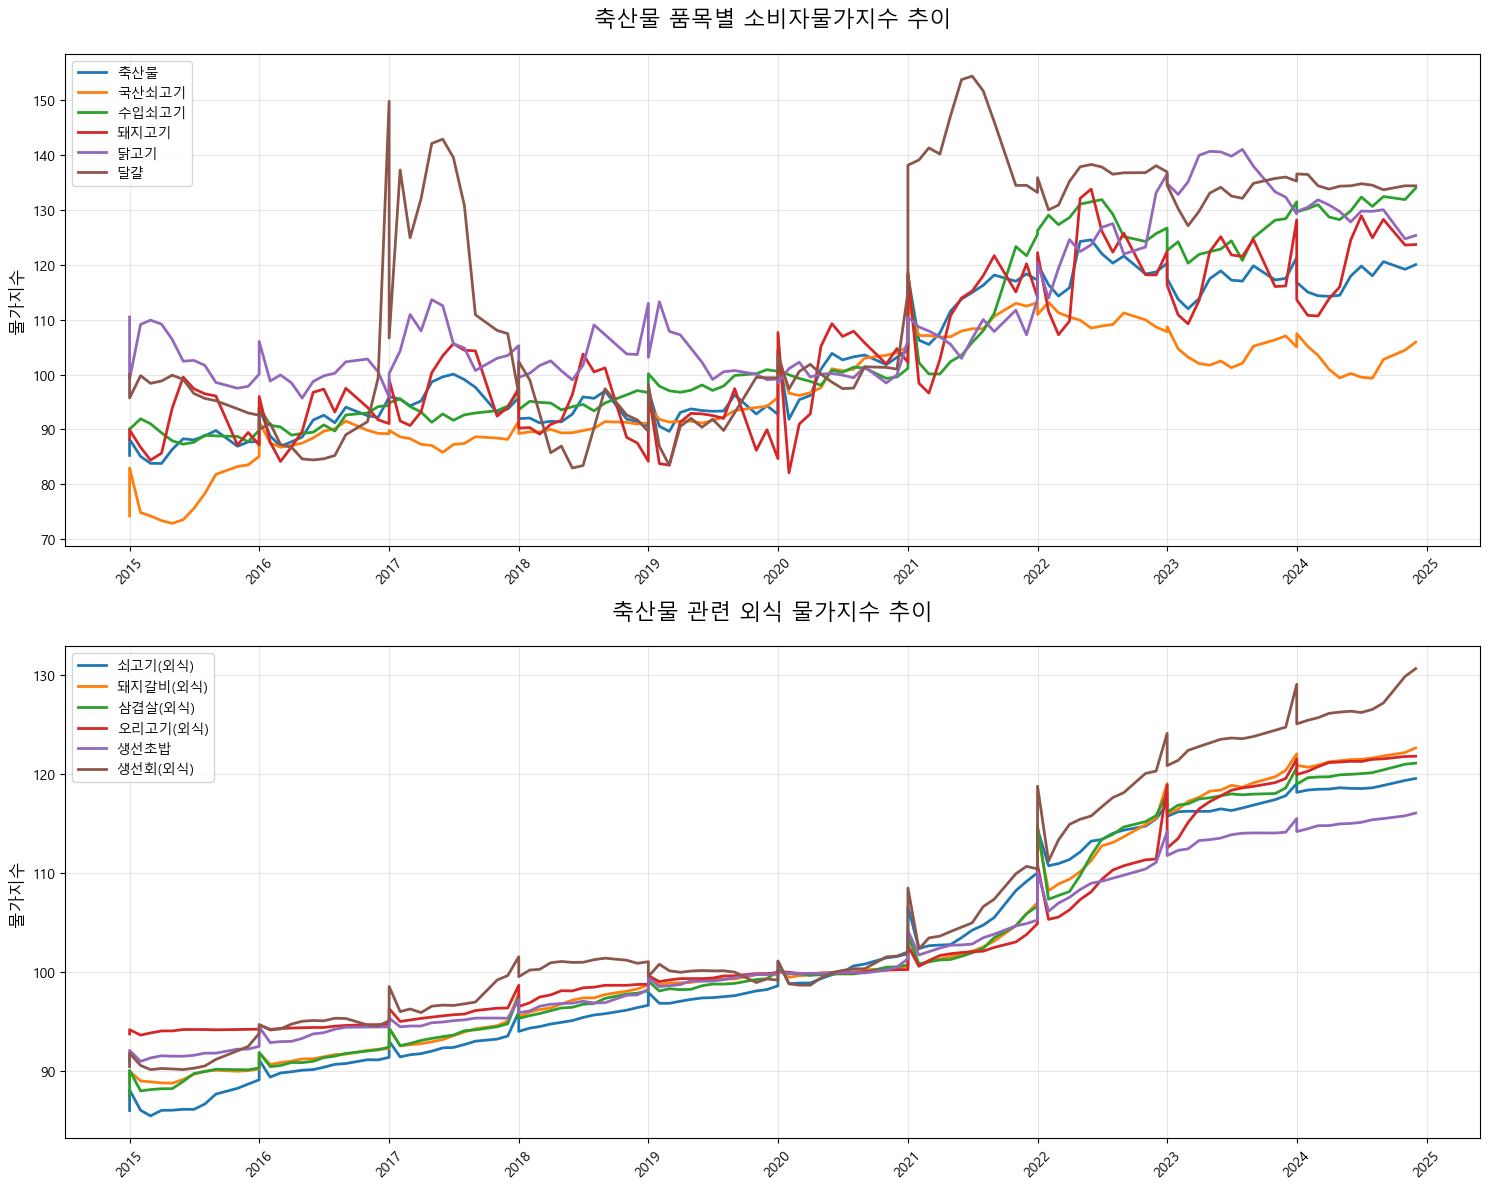


데이터 기간: 
시작: 2015-01 
종료: 2024-12


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
cpi_df = pd.read_csv('data/[월별]품목별_소비자물가지수_전국_10년.csv', encoding='utf-8')

# 데이터 정렬을 위해 월별 컬럼을 제대로 된 날짜 형식으로 변환
cpi_df['날짜'] = pd.to_datetime(cpi_df['월별'].astype(str).replace(r'\.0$', '', regex=True) + '.01')

# 날짜순으로 정렬
cpi_df = cpi_df.sort_values('날짜')

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 1. 축산물 품목
items = ['축산물', '국산쇠고기', '수입쇠고기', '돼지고기', '닭고기', '달걀']
for item in items:
    ax1.plot(cpi_df['날짜'], cpi_df[item], label=item, linewidth=2)

ax1.set_title('축산물 품목별 소비자물가지수 추이', fontsize=16, pad=20)
ax1.set_ylabel('물가지수', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. 외식 물가
restaurant_items = ['쇠고기(외식)', '돼지갈비(외식)', '삼겹살(외식)', 
                   '오리고기(외식)', '생선초밥', '생선회(외식)']
for item in restaurant_items:
    ax2.plot(cpi_df['날짜'], cpi_df[item], label=item, linewidth=2)

ax2.set_title('축산물 관련 외식 물가지수 추이', fontsize=16, pad=20)
ax2.set_ylabel('물가지수', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 데이터 확인
print("\n데이터 기간:", 
      f"\n시작: {cpi_df['날짜'].min().strftime('%Y-%m')}", 
      f"\n종료: {cpi_df['날짜'].max().strftime('%Y-%m')}")

### 전체 품목 소비자 물가지수 추이

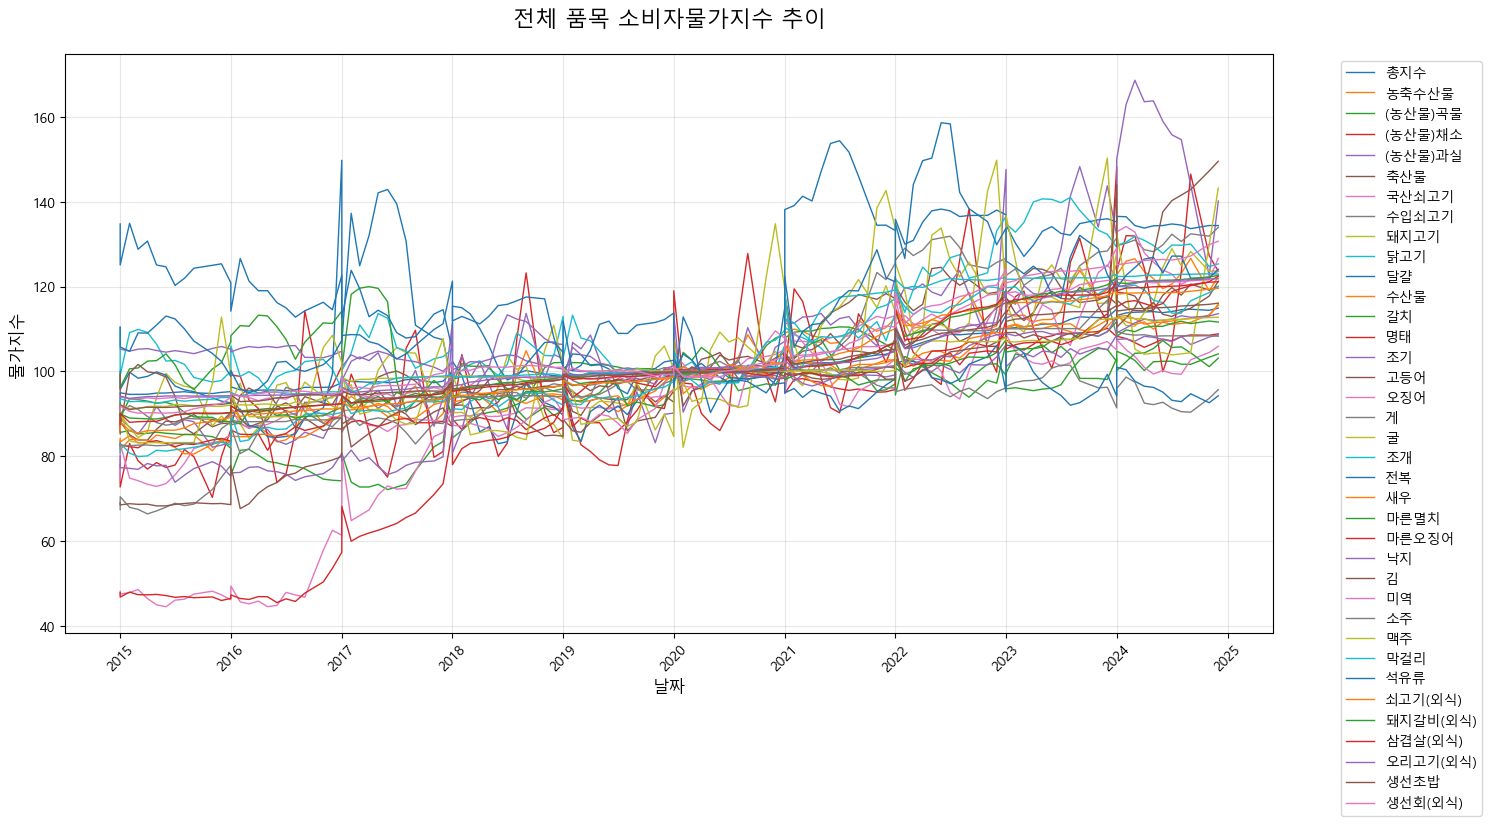


=== 품목별 물가상승률 (처음 대비 마지막) ===
총지수: 21.4%
농축수산물: 46.1%
(농산물)곡물: 20.0%
(농산물)채소: 58.4%
(농산물)과실: 62.9%
축산물: 40.7%
국산쇠고기: 42.6%
수입쇠고기: 48.7%
돼지고기: 40.3%
닭고기: 13.4%
달걀: 34.3%
수산물: 37.2%
갈치: 3.8%
명태: 31.0%
조기: 3.1%
고등어: 22.3%
오징어: 156.6%
게: 42.0%
굴: 62.0%
조개: 48.4%
전복: -30.0%
새우: nan%
마른멸치: 20.0%
마른오징어: 155.8%
낙지: 41.9%
김: 116.6%
미역: 36.2%
소주: 31.4%
맥주: 23.4%
막걸리: 32.4%
석유류: 12.4%
쇠고기(외식): 39.0%
돼지갈비(외식): 38.0%
삼겹살(외식): 38.4%
오리고기(외식): 29.9%
생선초밥: 27.6%
생선회(외식): 44.5%


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
cpi_df = pd.read_csv('data/[월별]품목별_소비자물가지수_전국_10년.csv', encoding='utf-8')

# 날짜 변환
cpi_df['날짜'] = pd.to_datetime(cpi_df['월별'].astype(str).replace(r'\.0$', '', regex=True) + '.01')
cpi_df = cpi_df.sort_values('날짜')

# '월별' 컬럼을 제외한 모든 컬럼 선택
columns_to_plot = [col for col in cpi_df.columns if col not in ['월별', '날짜']]

# 그래프 생성 
plt.figure(figsize=(15, 8))

for col in columns_to_plot:
   plt.plot(cpi_df['날짜'], cpi_df[col], label=col, linewidth=1)

plt.title('전체 품목 소비자물가지수 추이', fontsize=16, pad=20)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('물가지수', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 기초 통계 출력
print("\n=== 품목별 물가상승률 (처음 대비 마지막) ===")
for col in columns_to_plot:
   initial_value = cpi_df[col].iloc[0]
   final_value = cpi_df[col].iloc[-1]
   growth_rate = ((final_value - initial_value) / initial_value) * 100
   print(f"{col}: {growth_rate:.1f}%")

In [8]:
print(cpi_df.columns.tolist())

['월별', '총지수', '농축수산물', '(농산물)곡물', '(농산물)채소', '(농산물)과실', '축산물', '국산쇠고기', '수입쇠고기', '돼지고기', '닭고기', '달걀', '수산물', '갈치', '명태', '조기', '고등어', '오징어', '게', '굴', '조개', '전복', '새우', '마른멸치', '마른오징어', '낙지', '김', '미역', '소주', '맥주', '막걸리', '석유류', '쇠고기(외식)', '돼지갈비(외식)', '삼겹살(외식)', '오리고기(외식)', '생선초밥', '생선회(외식)', '날짜']


### 선택한 품목 소비자 물가 지수 추이

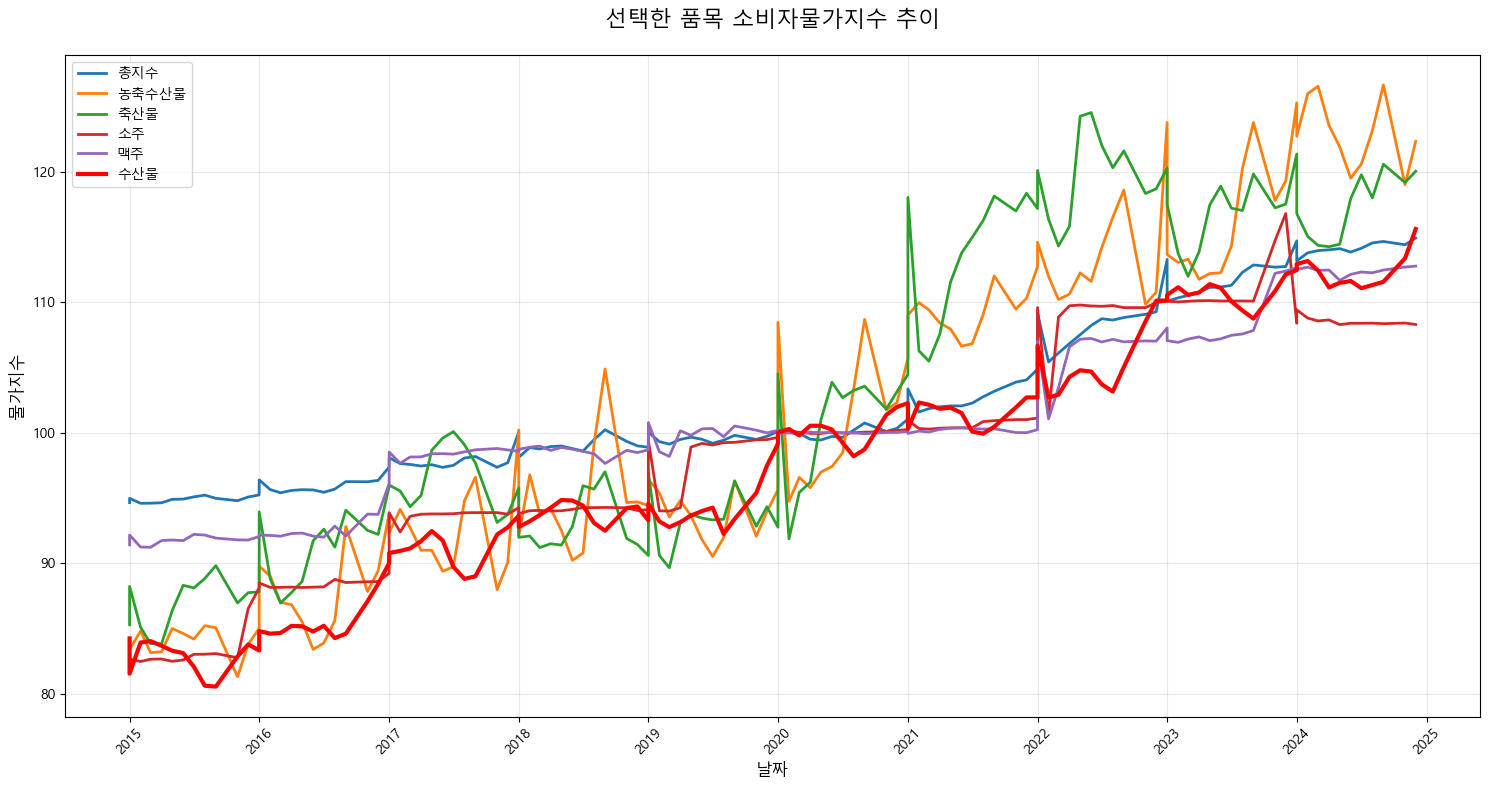

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
cpi_df = pd.read_csv('data/[월별]품목별_소비자물가지수_전국_10년.csv', encoding='utf-8')

# 날짜 변환
cpi_df['날짜'] = pd.to_datetime(cpi_df['월별'].astype(str).replace(r'\.0$', '', regex=True) + '.01')
cpi_df = cpi_df.sort_values('날짜')

# 비교하고 싶은 열들만 선택
columns_to_plot = ['총지수', '농축수산물', '축산물', '수산물', '소주', '맥주']  # 원하는 열 이름을 리스트에 추가
highlight_column = '수산물'  # 강조하고 싶은 열

plt.figure(figsize=(15, 8))

for col in columns_to_plot:
	if col != highlight_column:
		plt.plot(cpi_df['날짜'], cpi_df[col], label=col, linewidth=2)

# 강조하고 싶은 열은 두껍게, 선명하게 그리기
plt.plot(cpi_df['날짜'], cpi_df[highlight_column], 
        label=highlight_column, 
        linewidth=3,  # 선 두께 증가
        color='red',  # 색상 지정
        zorder=5)     # 다른 선들보다 앞에 표시

plt.title('선택한 품목 소비자물가지수 추이', fontsize=16, pad=20)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('물가지수', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 수산물과 다른 품목 지수와의 상관관계

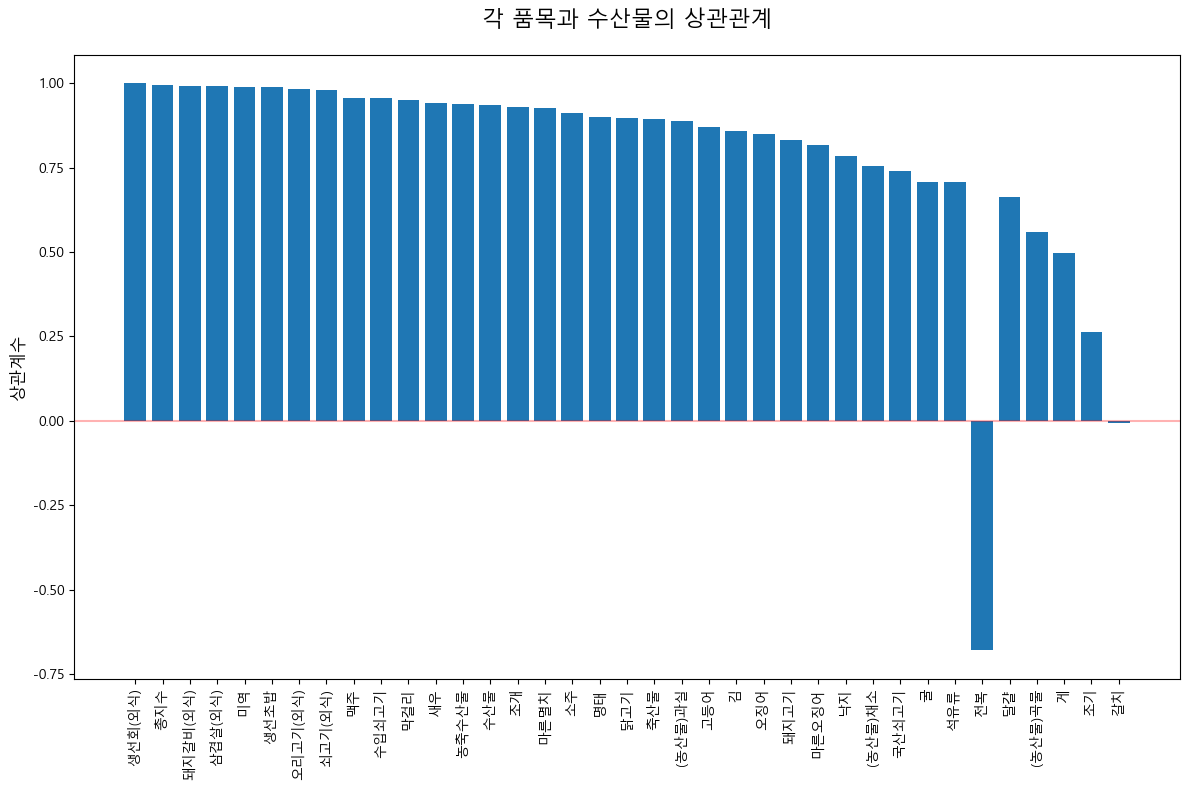

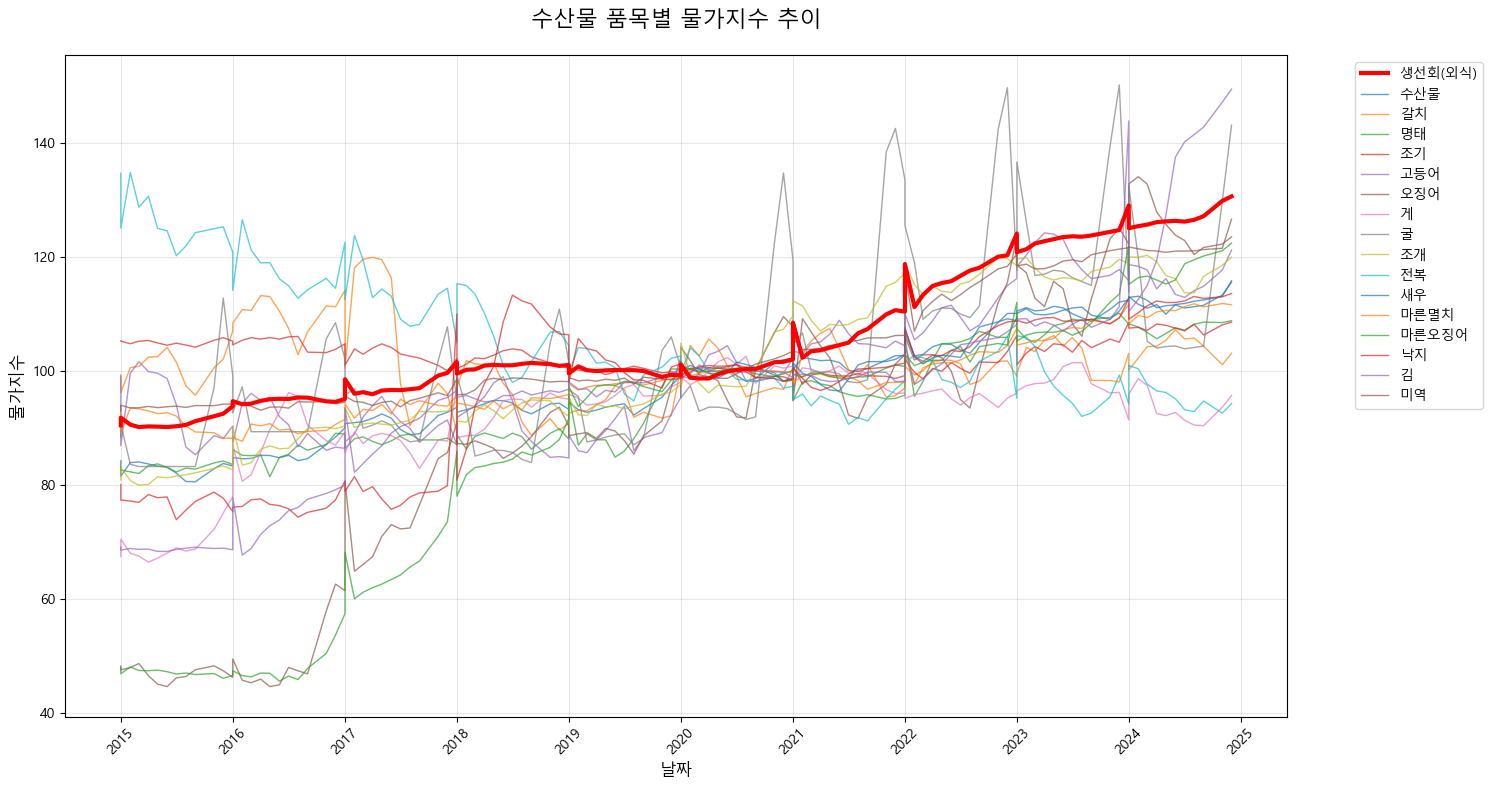


=== 수산물과 가장 강한 양의 상관관계를 보이는 품목 (상위 10개) ===
          품목  수산물과의_상관계수
36   생선회(외식)    1.000000
0        총지수    0.994106
32  돼지갈비(외식)    0.991561
33   삼겹살(외식)    0.990216
26        미역    0.988207
35      생선초밥    0.987473
34  오리고기(외식)    0.983039
31   쇠고기(외식)    0.979877
28        맥주    0.955250
7      수입쇠고기    0.954514

=== 수산물과 가장 약한/음의 상관관계를 보이는 품목 (하위 10개) ===
         품목  수산물과의_상관계수
3   (농산물)채소    0.755911
6     국산쇠고기    0.738536
18        굴    0.708255
30      석유류    0.708113
20       전복   -0.678540
10       달걀    0.664253
2   (농산물)곡물    0.558331
17        게    0.498360
14       조기    0.264678
12       갈치   -0.006866


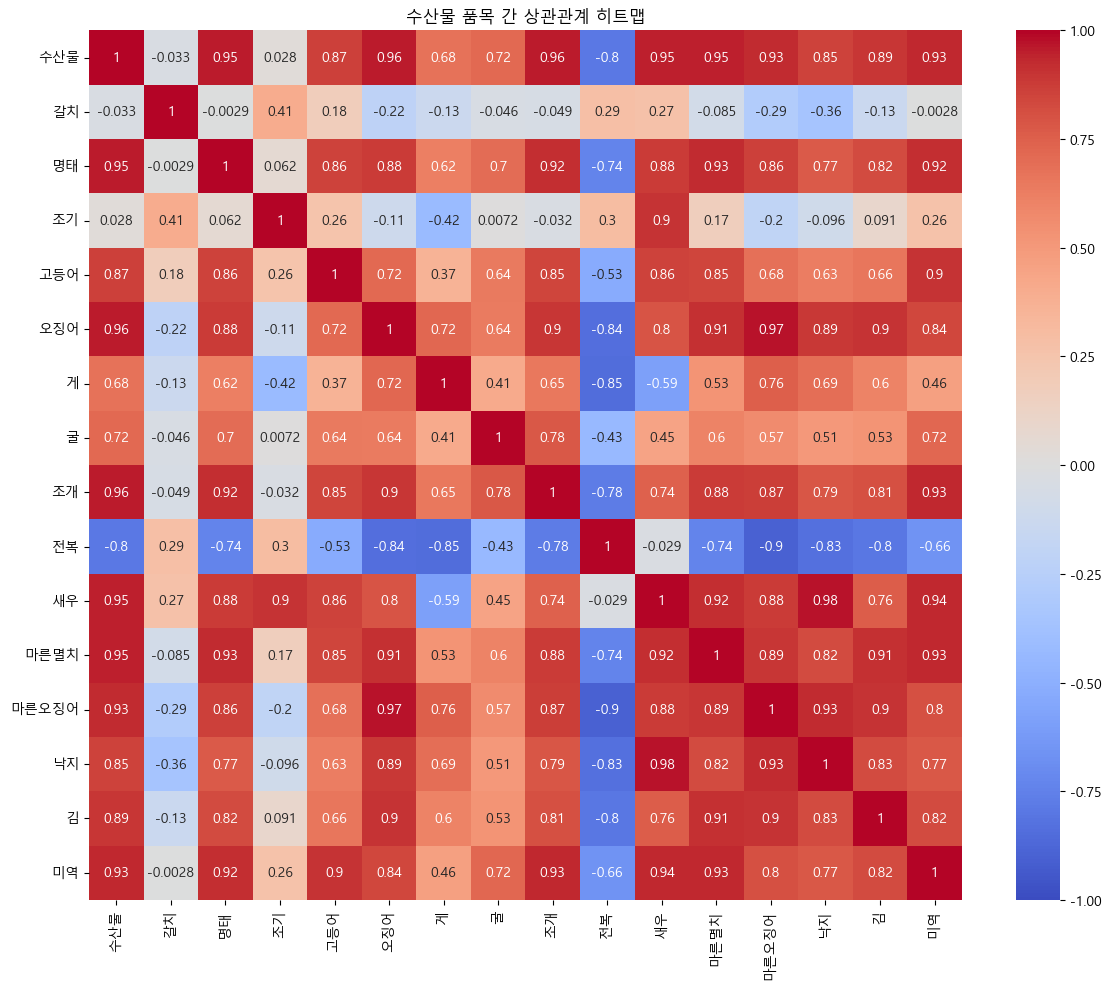

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 읽기 및 전처리
cpi_df = pd.read_csv('data/[월별]품목별_소비자물가지수_전국_10년.csv', encoding='utf-8')

# 상관관계 계산
correlations = pd.DataFrame()
correlations['품목'] = [col for col in cpi_df.columns if col not in ['월별']]
correlations['수산물과의_상관계수'] = [cpi_df['생선회(외식)'].corr(cpi_df[col]) if col != '생선회(외식)' else 1.0 
                                for col in cpi_df.columns if col not in ['월별']]

# 절댓값 기준으로 정렬
correlations = correlations.sort_values('수산물과의_상관계수', key=abs, ascending=False)

# 시각화
plt.figure(figsize=(12, 8))
plt.bar(range(len(correlations)), correlations['수산물과의_상관계수'])
plt.xticks(range(len(correlations)), correlations['품목'], rotation=90)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

plt.title('각 품목과 수산물의 상관관계', fontsize=16, pad=20)
plt.ylabel('상관계수', fontsize=12)

plt.tight_layout()
plt.show()

# 수산물 관련 품목 선택하여 시계열 그래프 그리기
seafood_items = ['수산물', '갈치', '명태', '조기', '고등어', '오징어', '게', '굴', 
                '조개', '전복', '새우', '마른멸치', '마른오징어', '낙지', '김', '미역']

cpi_df['날짜'] = pd.to_datetime(cpi_df['월별'].astype(str).replace(r'\.0$', '', regex=True) + '.01')
cpi_df = cpi_df.sort_values('날짜')

plt.figure(figsize=(15, 8))

# 수산물(전체)은 굵게 표시
plt.plot(cpi_df['날짜'], cpi_df['생선회(외식)'], label='생선회(외식)', linewidth=3, color='red', zorder=5)

# 개별 품목은 얇게 표시
for item in seafood_items:
   if item != '생선회(외식)':
       plt.plot(cpi_df['날짜'], cpi_df[item], label=item, linewidth=1, alpha=0.7)

plt.title('수산물 품목별 물가지수 추이', fontsize=16, pad=20)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('물가지수', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 상위 10개, 하위 10개 품목 출력
print("\n=== 수산물과 가장 강한 양의 상관관계를 보이는 품목 (상위 10개) ===")
print(correlations.head(10))

print("\n=== 수산물과 가장 약한/음의 상관관계를 보이는 품목 (하위 10개) ===")
print(correlations.tail(10))

# 수산물 관련 품목들 간의 상관관계 히트맵
correlation_matrix = cpi_df[seafood_items].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('수산물 품목 간 상관관계 히트맵')
plt.tight_layout()
plt.show()